In [3]:
import pandas as pd 

In [4]:
tge_init = pd.read_excel('tge.xls')
tge_init

,Ocak,Şubat,Mart,Nisan,Mayıs,Haziran,Temmuz,Ağustos,Eylül,Ekim,Kasım,Aralık
2007,78.581836,79.520586,79.219967,80.440610,81.732518,80.949646,82.270596,85.024409,83.885017,82.975294,79.297517,80.666743
2008,78.892660,74.376834,68.739040,63.013179,62.138995,61.791560,63.786432,66.626884,67.497974,61.017036,55.657354,56.676348
2009,58.334549,60.783764,61.550822,67.531254,70.053371,72.046072,69.145565,68.079112,68.701343,67.236810,65.155241,65.567809
2010,66.013158,68.626109,71.519006,72.573485,73.357630,74.815107,74.254487,74.128791,77.184919,75.794565,78.115084,77.765970
2011,78.062666,80.340164,80.177315,80.235176,79.628224,83.193337,81.611040,78.521325,80.473879,76.505506,77.817545,78.820463
2012,79.029069,79.648792,79.336559,75.748829,78.109503,76.758228,77.012661,74.332996,72.116220,69.342532,72.604097,73.587634
2013,75.787368,76.660250,74.911700,75.620600,77.461800,76.231600,78.469400,77.176200,72.112700,75.538500,77.503000,74.972300
2014,72.357599,69.237250,72.712369,78.475685,76.012310,73.705105,73.910926,73.232970,73.963282,70.336465,68.674088,67.749206
2015,67.706960,68.063440,64.393494,65.352375,64.291140,66.448318,64.664529,62.350107,58.519801,62.781250,77.147421,73.575160
2016,71.618563,66.638793,66.996338,68.464690,68.752418,69.428949,67.026588,74.441430,74.286150,74.036602,68.925356,63.380210


In [5]:
# A function to convert our datasets to desired form.
def converter(data, name):
    df = pd.DataFrame(columns=[name])
    for year, row in data.iterrows():
        i = 1
        for column in data:
            df.loc[str(year) +'-'+ str(i)] = row[column]
            i += 1
    return df    

In [6]:
tge = converter(tge_init,'Tüketici Güven Endeksi')
tge.head()

,Tüketici Güven Endeksi
2007-1,78.581836
2007-2,79.520586
2007-3,79.219967
2007-4,80.440610
2007-5,81.732518


In [7]:
ege_init = pd.read_excel('ege.xls')
ege = converter(ege_init,'Ekonomik Güven Endeksi')
ege.head()

,Ekonomik Güven Endeksi
2007-1,112.6
2007-2,110.0
2007-3,110.3
2007-4,111.5
2007-5,106.1


In [8]:
tufe_init = pd.read_excel('tfe.xls')
tufe = converter(tufe_init,'Tüketici Fiyat Endeksi')
tufe.head()

,Tüketici Fiyat Endeksi
2007-1,135.84
2007-2,136.42
2007-3,137.67
2007-4,139.33
2007-5,140.03


In [9]:
ois_init = pd.read_excel('ois.xls')
ois = converter(ois_init,'OİS')
ois.head()

,OİS
2007-1,-0.58
2007-2,0.66
2007-3,0.99
2007-4,1.27
2007-5,1.33


In [10]:
ufe_init = pd.read_excel('ufe.xls')
ufe = converter(ufe_init,'Üretici Fiyat Endeksi')
ufe.head()

,Üretici Fiyat Endeksi
2007-1,-0.05
2007-2,0.95
2007-3,0.97
2007-4,9.68
2007-5,0.39


In [11]:
#merged = pd.merge(pd.merge(tge,ege,left_index=True, right_index=True),tufe,left_index=True, right_index=True)
merged = ege.merge(tufe, left_index=True, right_index=True).merge(ufe, left_index=True, right_index=True).merge(ois, left_index=True, right_index=True).merge(tge, left_index=True, right_index=True)
merged.head()

,Ekonomik Güven Endeksi,Tüketici Fiyat Endeksi,Üretici Fiyat Endeksi,OİS,Tüketici Güven Endeksi
2007-1,112.6,135.84,-0.05,-0.58,78.581836
2007-2,110.0,136.42,0.95,0.66,79.520586
2007-3,110.3,137.67,0.97,0.99,79.219967
2007-4,111.5,139.33,9.68,1.27,80.440610
2007-5,106.1,140.03,0.39,1.33,81.732518


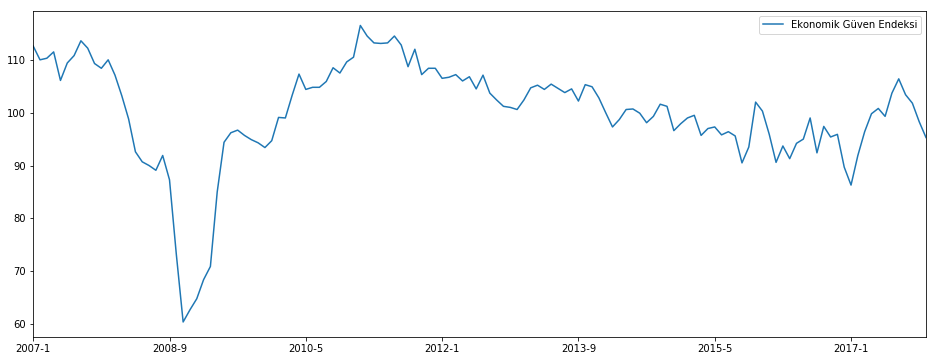

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

# ege
merged.plot(y="Ekonomik Güven Endeksi", kind='line', figsize=[16,6])

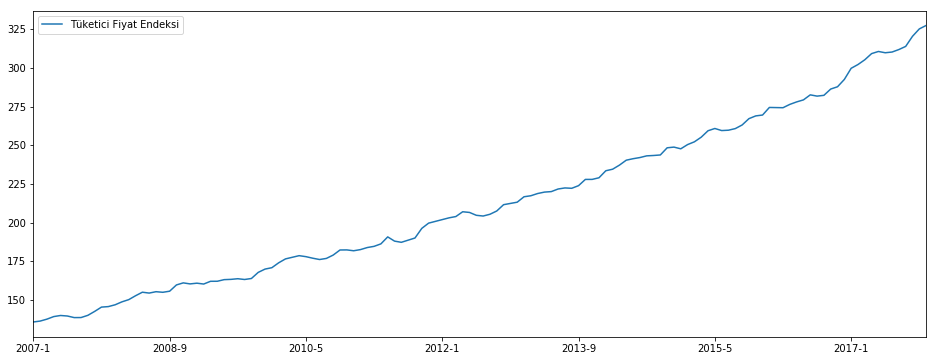

In [13]:
#tufe
merged.plot(y="Tüketici Fiyat Endeksi", kind='line', figsize=[16,6])

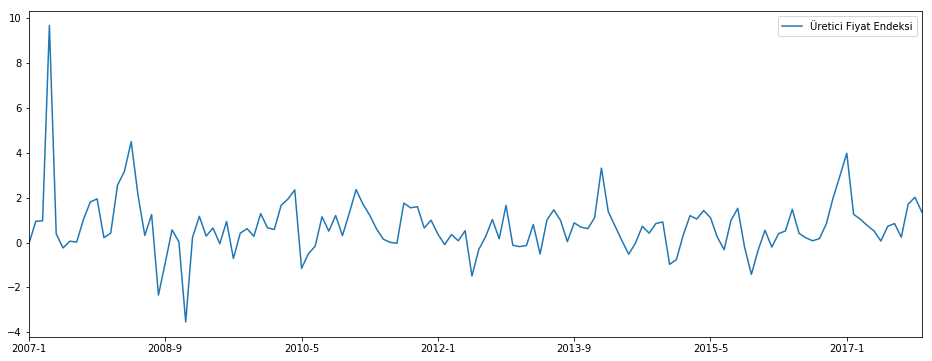

In [14]:
#ufe
merged.plot(y="Üretici Fiyat Endeksi", kind='line', figsize=[16,6])

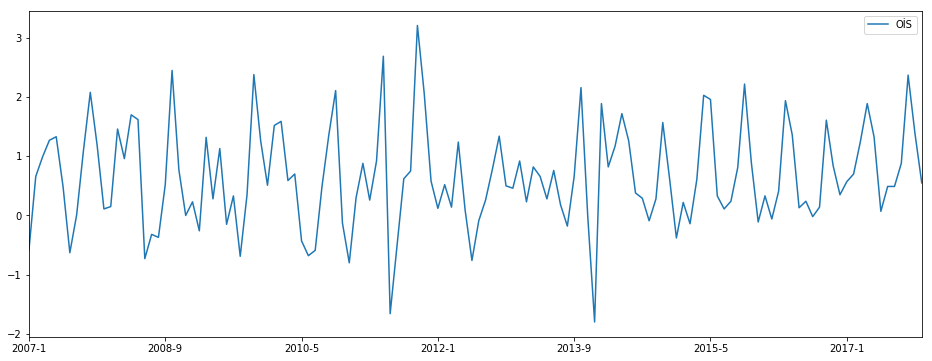

In [15]:
#ois
merged.plot(y="OİS", kind='line', figsize=[16,6])

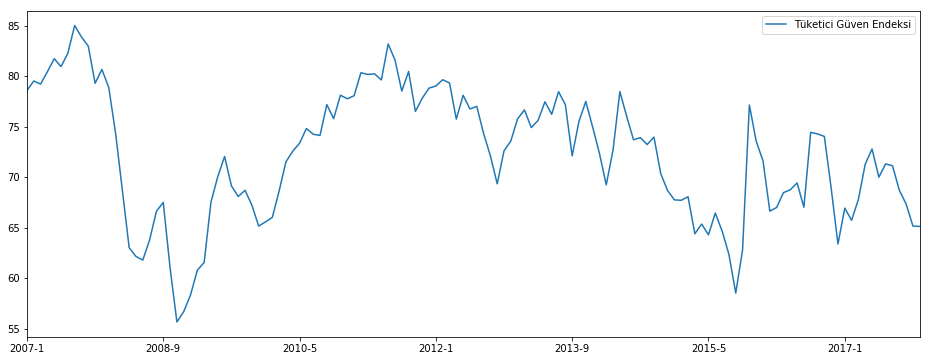

In [16]:
#y = tge
merged.plot(y="Tüketici Güven Endeksi", kind='line', figsize=[16,6])

In [17]:
from sklearn.model_selection import train_test_split
x = merged.iloc[:,[0,1,2,3]].values
y = merged.iloc[:,4].values
print(x.shape, y.shape)

(132, 4) (132,)


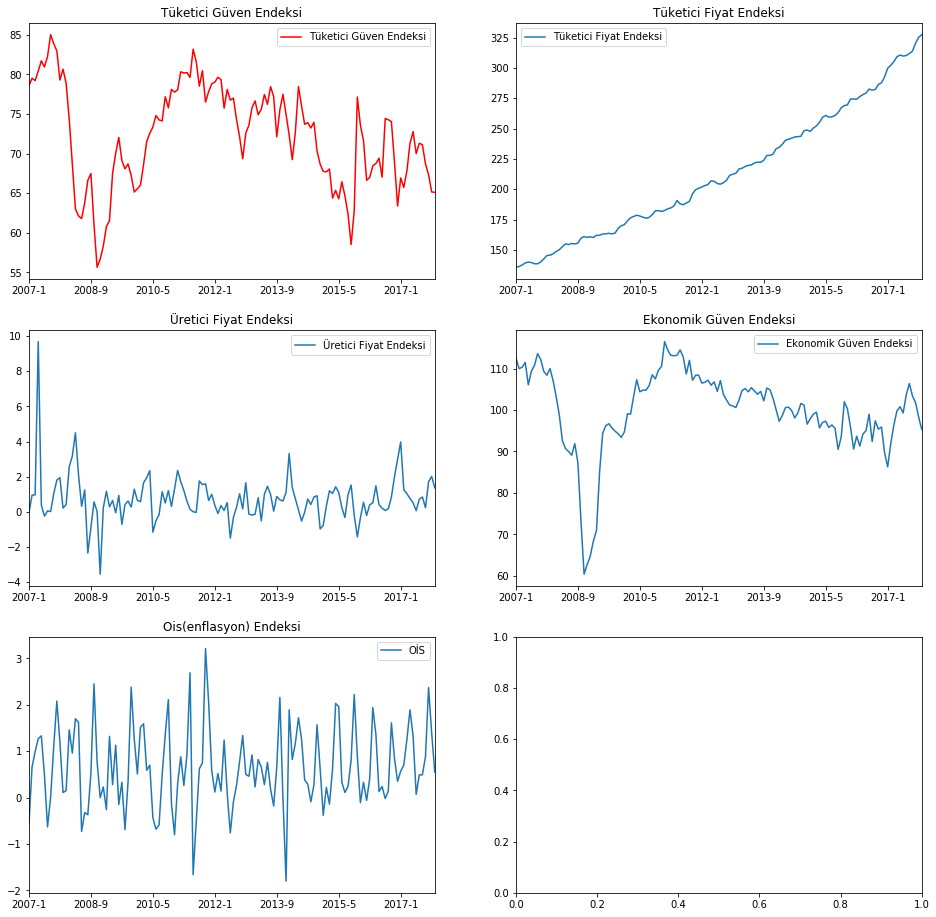

In [97]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16,16))
axes = axes.ravel()
merged.plot(y="Tüketici Güven Endeksi",ax=axes[0],title='Tüketici Güven Endeksi',kind='line',color='red')
merged.plot(y="Tüketici Fiyat Endeksi",ax=axes[1],title='Tüketici Fiyat Endeksi', kind='line')
merged.plot(y="Üretici Fiyat Endeksi",ax=axes[2],title='Üretici Fiyat Endeksi', kind='line') 
merged.plot(y="Ekonomik Güven Endeksi",ax=axes[3],title='Ekonomik Güven Endeksi', kind='line')
merged.plot(y="OİS",ax=axes[4],title='Ois(enflasyon) Endeksi',kind='line')

# Validating with splitting

In [18]:
#create an instance of a simple regression model
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
model = linear_model.LinearRegression(copy_X=True, fit_intercept=True, normalize=False)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# Train the model using the training data that we created
model.fit(x_train, y_train)
print('Intercept: \n',model.intercept_)
print('Coefficients: \n', model.coef_)

# MODEL TESTING: make predictions based on the test values of x
y_pred = model.predict(x_test)
confidence = model.score(x_test,y_test)
print(confidence)

# MODEL PERFORMANCE
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Intercept: 
 19.5190354893
Coefficients: 
 [ 0.56781637 -0.01741106 -0.44053079 -0.07345575]
0.826821446396
Mean squared error: 9.88
Variance score: 0.83


# 10-Fold Cross Validation

In [19]:
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

kf = KFold(n_splits=10, shuffle=True)
kf.get_n_splits(x) # returns the number of splitting iterations in the cross-validator

fold_model = linear_model.LinearRegression()

basari=0
hata=0

for train_index, test_index in kf.split(x):
    #print('TRAIN:', train_index, 'TEST:', test_index)
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    #print(x_train)
    
    fold_model.fit(x_train, y_train)
    #print('Intercept: \n',model.intercept_)
    #print('Coefficients: \n', model.coef_)

    # make predictions based on the test values of x
    y_pred = fold_model.predict(x_test)
    
    #print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
    hata += mean_squared_error(y_test, y_pred)
    
    #print("Variance score: %.2f\n\n" % r2_score(y_test, y_pred))
    basari += r2_score(y_test, y_pred)

print('Intercept: \n',fold_model.intercept_)
print('Coefficients: \n', fold_model.coef_)
print("Mean squared error: ", hata/10) #mean_squared_error
print("Variance score: ",  basari/10) #r2_score


Intercept: 
 24.8313137058
Coefficients: 
 [ 0.52708844 -0.02292318 -0.35142843 -0.30764063]
Mean squared error:  9.74795448217
Variance score:  0.713724418993


In [20]:
from matplotlib import pyplot as plt

# df: DataFrame
# x_indices: int[]
# y_index: int
def create_model(df, x_indices, y_index, n_splits=10):
    
    x = df.iloc[:,x_indices].values
    y = df.iloc[:,y_index].values
    
    kf = KFold(n_splits=n_splits, shuffle=True)
    kf.get_n_splits(x)
    
    lm = linear_model.LinearRegression()
    score = 0
    error = 0
    
    for train_index, test_index in kf.split(x):
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]
    
        lm.fit(x_train, y_train)
        
        y_pred = lm.predict(x_test)
        error += mean_squared_error(y_test, y_pred)    
        score += r2_score(y_test, y_pred)
        
    return lm, error/n_splits, score/n_splits

# plot a model with one variable. multiple variables are not supported
def plot_model(df, model, x_indices, y_index, percent=1):
    x = df.iloc[:,x_indices].values
    y = df.iloc[:,y_index].values
    if percent > 1:
        percent = 1
    elif percent < 0.01:
        percent = 0.01
    
    count = int(x.size * percent)
    x_test = x[:count]
    y_pred = model.predict(x_test)
    
    plt.scatter(x, y)
    plt.plot(x_test, y_pred, color='red', marker='o', linewidth=0, markersize=3)
    
    plt.show()

def print_model_info(model, error, score):
    print('Intercept: \n',model.intercept_)
    print('Coefficients: \n', model.coef_)
    print("Mean squared error: ", error) #mean_squared_error
    print("Variance score: ",  score) #r2_score

### Ekonomik Güven Endeksi ve Tüketici Güven Endeksi arasındaki ilişki

Intercept: 
 19.1735766286
Coefficients: 
 [ 0.52990927]
Mean squared error:  11.2907021865
Variance score:  0.66931728685


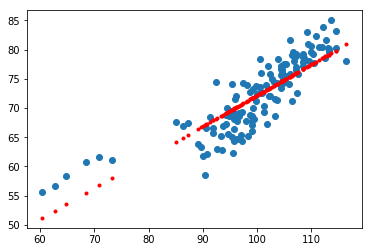

In [21]:
# ege-tge
ege_tge, error, score = create_model(df=merged, x_indices=[0], y_index=4)

print_model_info(ege_tge, error, score)

plot_model(df=merged, model=ege_tge, x_indices=[0], y_index=4)


### Tüketici Fiyat Endeksi ve Tüketici Güven Endeksi arasındaki ilişki

Intercept: 
 78.5421870907
Coefficients: 
 [-0.03030922]
Mean squared error:  39.173013359
Variance score:  -0.0417642311642


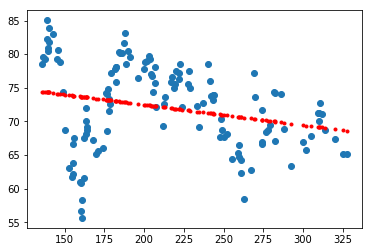

In [22]:
# tufe-tge
tufe_tge, error, score = create_model(df=merged, x_indices=[1], y_index=4)

print_model_info(tufe_tge, error, score)

plot_model(df=merged, model=tufe_tge, x_indices=[1], y_index=4)


# 10-Fold Cross Validation (with function)

In [23]:
all_model, error, score = create_model(df=merged, x_indices=[0,1,2,3], y_index=4)

print_model_info(all_model, error, score)


Intercept: 
 24.6202209381
Coefficients: 
 [ 0.53968545 -0.02768813 -0.39498913 -0.17696045]
Mean squared error:  10.2567209771
Variance score:  0.715912528894
